<a href="https://colab.research.google.com/github/harshithakotlure/Mid-Semester-Project-/blob/main/gradientBoostModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [4]:
# load data
df = pd.read_csv('features.csv', header=0)
target = pd.read_csv('targets.csv', header=0)
# Combine features and target
df['result'] = target.values.ravel()

# Convert to numpy arrays
X = df.values
y = target.values.ravel()

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

#scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


dtrain = xgb.DMatrix(X_train_scaled, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_encoded)

In [5]:
# Set up the params
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'eval_metric': 'mlogloss'
}

num_round = 100

In [6]:
model = xgb.train(params, dtrain, num_round)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


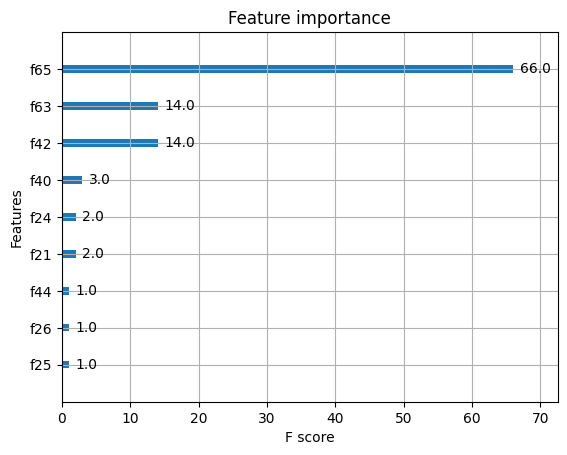

In [7]:
# Make predictions
y_pred = model.predict(dtest)
y_pred = le.inverse_transform(y_pred.astype(int))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualize feature importance
xgb.plot_importance(model)
plt.show()